Accuracy on the test set: 93.51%


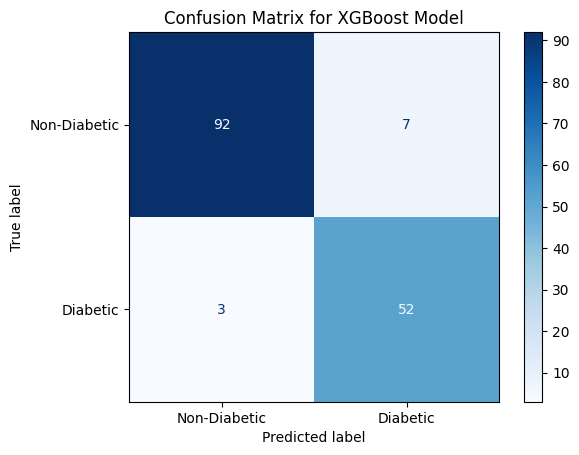

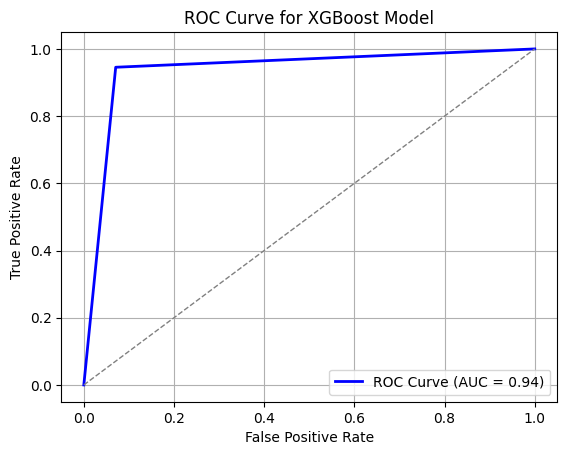

In [7]:
# #https://machinelearningmastery.com/random-forest-ensembles-with-xgboost/
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn import ensemble as en
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from xgboost import XGBRFClassifier

np.random.seed(2024)
diabetes = pd.read_csv('diabetes_preprocessed.csv')

y = diabetes.get('Outcome').values
X = diabetes.drop(axis='columns', columns ='Outcome').values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

learning_rate = 2 #2 is the best learning rate
model = XGBRFClassifier(learning_rate=learning_rate,n_estimators=50, subsample=0.9, colsample_bynode=0.2)
model.fit(X_test, y_test)
y_pred = model.predict(X_test)

#compute accuracy
test_accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

# ROC AUC Plot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGBoost Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()


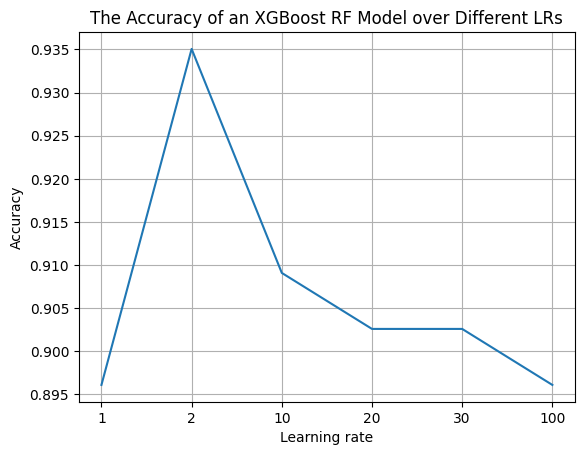

In [8]:
# testing different learning rates
learning_rates = [1, 2, 10, 20, 30, 100] 
learning_rate_name = ["1", "2", "10", "20", "30", "100"]

results = []

for lr in learning_rates:

    model = XGBRFClassifier(learning_rate=lr,n_estimators=50, subsample=0.9, colsample_bynode=0.2)
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    results.append(accuracy)

plt.plot(learning_rate_name, results)
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("The Accuracy of an XGBoost RF Model over Different LRs")
plt.grid()
plt.show()

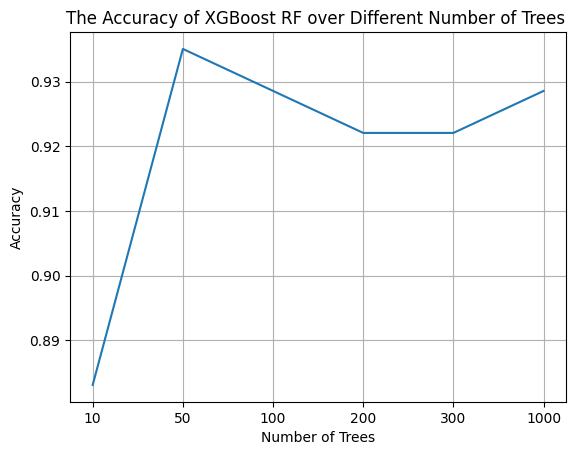

In [ ]:
# testing different number of trees in the forest
n_estimators = [10, 50, 100, 200, 300, 1000]
n_estimators_name = ["10", "50", "100", "200", "300", "1000"]
results = []

for estimator in n_estimators:
    model = XGBRFClassifier(learning_rate=2, n_estimators=estimator, subsample=0.9, colsample_bynode=0.2)
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) 
    results.append(accuracy)

plt.plot(n_estimators_name, results)
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("The Accuracy of XGBoost RF over Different Number of Trees ")
plt.grid()
plt.show()